In [1]:
#project1 eda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("Shape of dataset:", df.shape)
df.info()

Shape of dataset: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

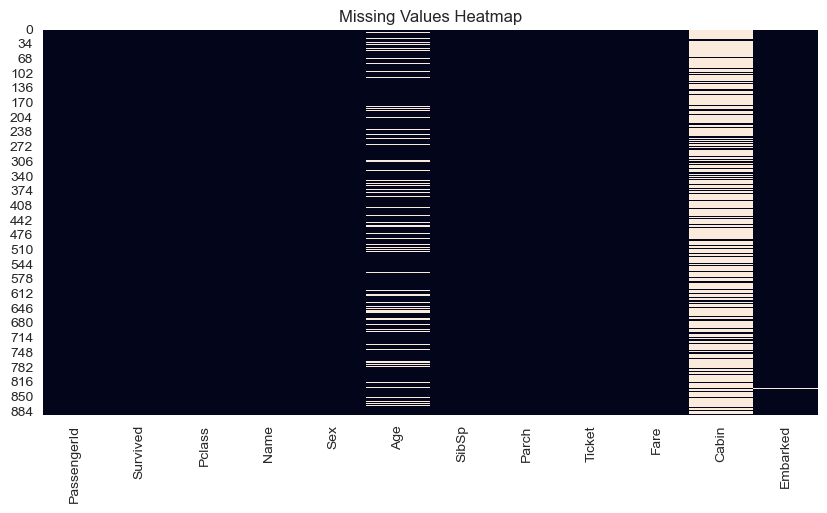

In [6]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

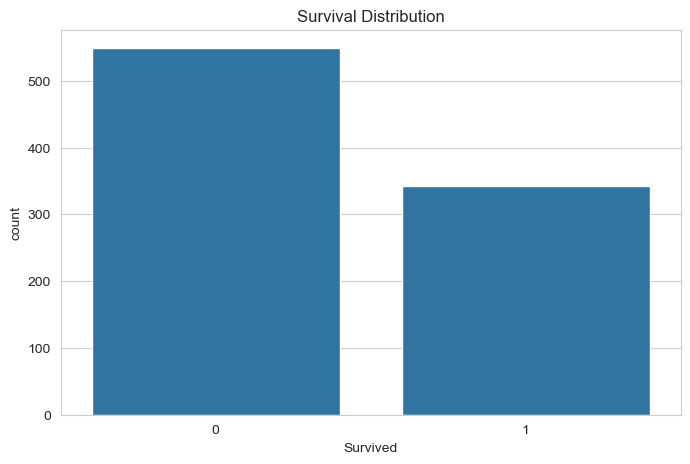

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [7]:
sns.countplot(x="Survived", data=df)
plt.title("Survival Distribution")
plt.show()

df["Survived"].value_counts(normalize=True)

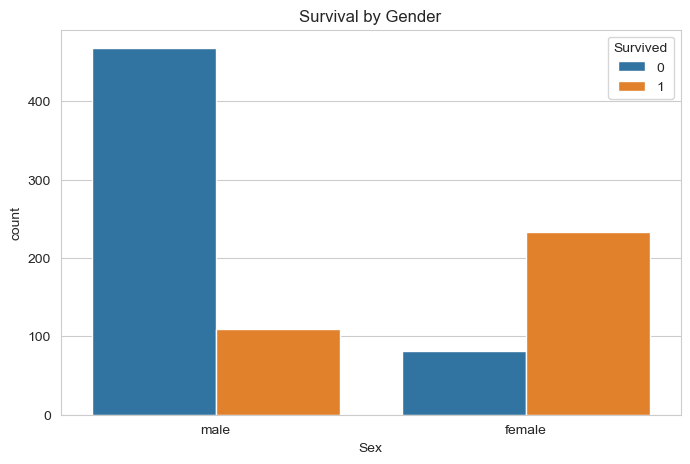

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [8]:
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Gender")
plt.show()

df.groupby("Sex")["Survived"].mean()

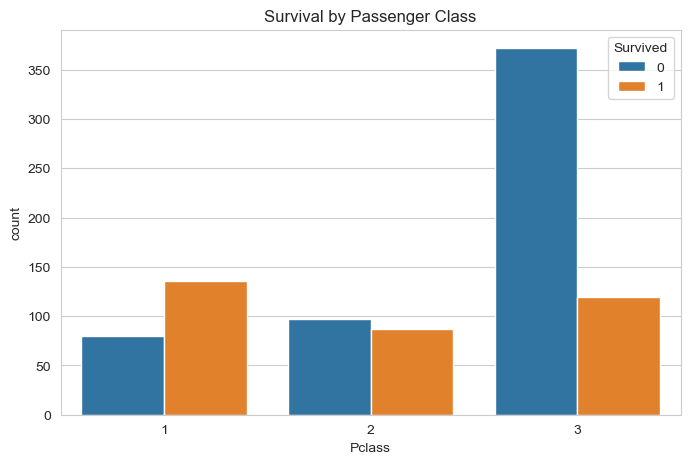

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [9]:
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.show()

df.groupby("Pclass")["Survived"].mean()

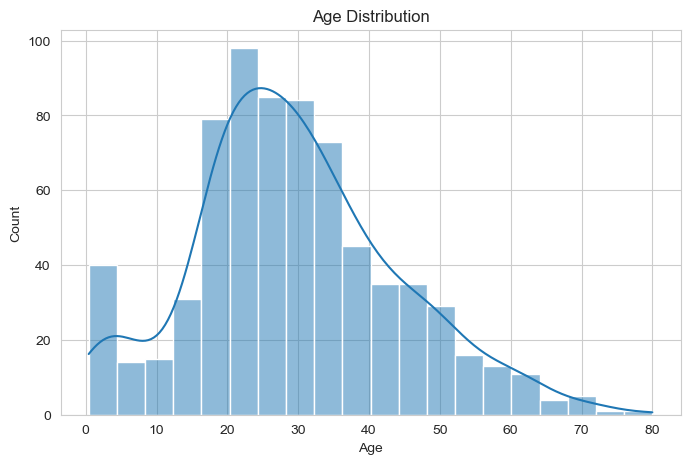

In [10]:
sns.histplot(df["Age"].dropna(), kde=True)
plt.title("Age Distribution")
plt.show()

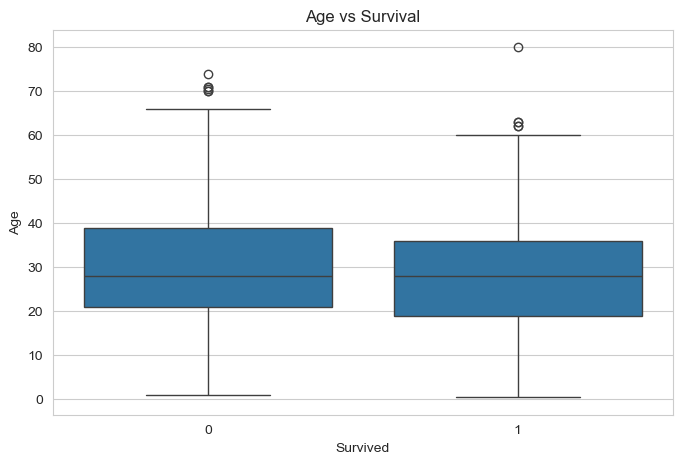

In [11]:
sns.boxplot(x="Survived", y="Age", data=df)
plt.title("Age vs Survival")
plt.show()

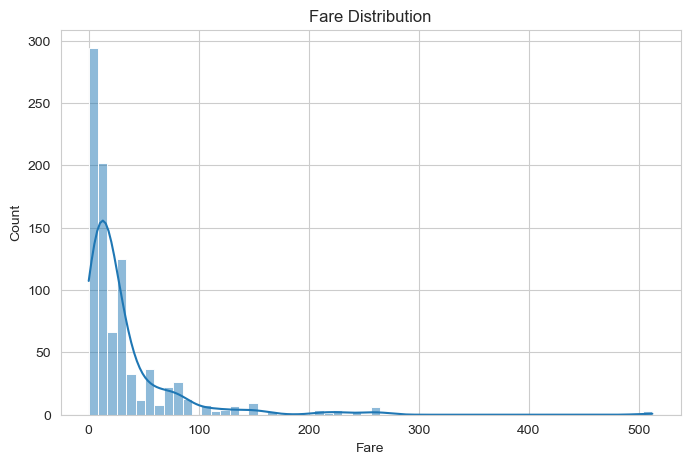

In [12]:
sns.histplot(df["Fare"], kde=True)
plt.title("Fare Distribution")
plt.show()

In [16]:
df_encoded = df.copy()
df_encoded["Sex"] = df_encoded["Sex"].map({"male":0, "female":1})
df_encoded = pd.get_dummies(df_encoded, columns=["Embarked"], drop_first=True)

plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<Figure size 1000x800 with 0 Axes>

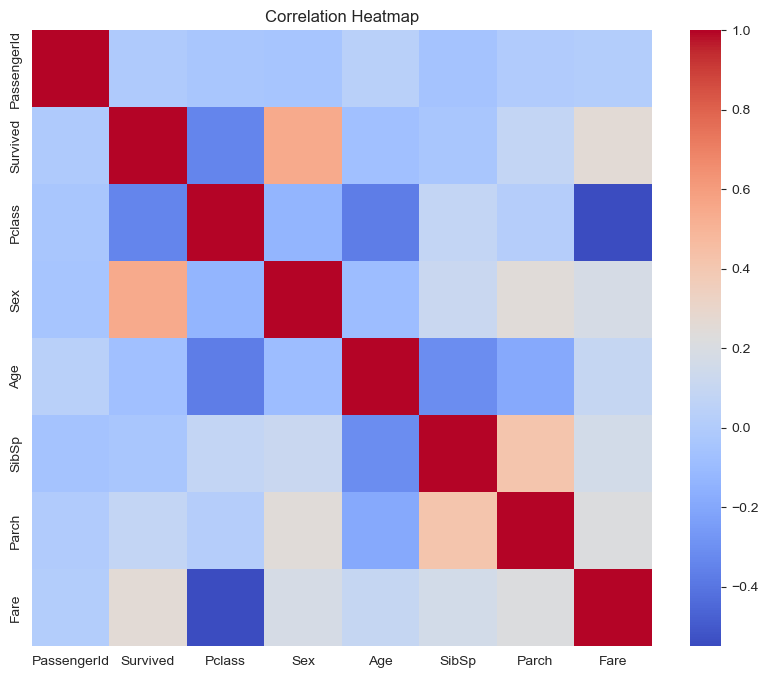

In [17]:
df_encoded = df.copy()

df_encoded["Sex"] = df_encoded["Sex"].map({"male": 0, "female": 1})
df_encoded = pd.get_dummies(df_encoded, columns=["Embarked"], drop_first=True)

# Select only numeric columns automatically
numeric_df = df_encoded.select_dtypes(include=["number"])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Key Insights

Females had significantly higher survival rate.

First-class passengers survived more than third-class.

Age has some influence but not strong alone.

Fare is positively correlated with survival.

Cabin column has too many missing values → will be dropped.

Age has missing values → will require imputation.